In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type').size()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
dtype: int64

In [5]:
df2 = df1.drop(['society', 'balcony', 'availability'], axis=1)
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df2.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3 = df2.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3.shape

(13246, 6)

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\TOKOFE~1\AppData\Local\Temp/ipykernel_9972/3303903377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df3.head()

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df3[df3.BHK> 20]

,area_type,location,size,total_sqft,bath,price,BHK
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [17]:
df3[df3['total_sqft'].apply(is_float)].head()

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
df3[~df3['total_sqft'].apply(is_float)].head()

,area_type,location,size,total_sqft,bath,price,BHK
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [19]:
df3[~df3['total_sqft'].apply(is_float)].head(200)

,area_type,location,size,total_sqft,bath,price,BHK
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [20]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,price,BHK
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0]) + float(tokens[1]))/2
  try:
    return float (x)
  except:
    return None

In [22]:
convert_sqft_to_num('1000')

1000.0

In [23]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [24]:
convert_sqft_to_num('4125Perch')

In [25]:
df4 = df3.copy()

In [26]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [27]:
df4.head()  

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [28]:
df4.head(30)

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Plot Area,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [29]:
df4.head(647)
df4.shape

(13246, 7)

In [30]:
df4.loc[648]

area_type     Built-up  Area
location             Arekere
size               9 Bedroom
total_sqft               NaN
bath                     9.0
price                  265.0
BHK                        9
Name: 648, dtype: object

In [31]:
df4.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
price                        186.0
BHK                              4
Name: 30, dtype: object

In [32]:
df4.isnull().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [33]:
df5 = df4.dropna()
df5.isnull().sum()
df5.shape
df7 = df5.copy()
df7.drop(df7.loc[df7['location']=="Kothanur"].index, inplace=True)
# df7.drop(columns=['size', 'total_sqft'], inplace=True)
df7.drop(df7.loc[df7['size']=="3 BHK"].index, inplace=True)
df7.head()

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4


In [34]:
df5.head(1000)

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...,...
1009,Super built-up Area,Pattandur Agrahara,2 BHK,1025.0,2.0,44.50,2
1010,Plot Area,Thurahalli,4 Bedroom,600.0,3.0,65.00,4
1011,Super built-up Area,Hallehalli,2 BHK,1225.0,2.0,53.00,2
1012,Built-up Area,5th Phase JP Nagar,2 BHK,1256.0,2.0,62.80,2


In [35]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [36]:
len(df5.location.unique())

1298

In [37]:
df6 = df5.copy()
df6['price_per_sqft'] = df6['price']*100000 / df6['total_sqft']
df6.location = df6.location.apply(lambda x: x.strip())
location_unclear = df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
df6.groupby('location').size().sort_values(ascending=False)
# location_unclear.head(10)

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Length: 1287, dtype: int64

In [38]:
len(location_unclear[location_unclear <= 10])

1047

In [39]:
location_less_than_10 = location_unclear[location_unclear <= 10]

In [40]:
location_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [41]:
df6.location = df6.location.apply(lambda x: 'other' if x in location_less_than_10 else x)

In [42]:
df6.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - At

In [43]:
len(df6.location.unique())

241

In [44]:
df6.head(10)

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [45]:
df6[df6.total_sqft/df6.BHK < 300].head(10)

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Plot Area,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Plot Area,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,Plot Area,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [46]:
df6[df6.total_sqft/df6.BHK < 300]

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Plot Area,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [47]:
df6[~(df6.total_sqft/df6.BHK < 300)]


,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Super built-up Area,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [48]:
df8 = df6.copy()

In [49]:
# drop
df8.drop(['area_type'], axis=1, inplace=True)
df8.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [50]:
df8.shape

(13200, 7)

In [51]:
df9 = df8[~(df8.total_sqft/df8.BHK < 300)]
df9

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [52]:
df9.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [53]:
def delete_ouliner(df):
  df_out = pd.DataFrame()
  for location, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    takenData = subdf[(subdf.price_per_sqft <= (m + st)) & (subdf.price_per_sqft > (m - st))]
    df_out = pd.concat([df_out, takenData])
  return df_out

In [54]:
df10 = delete_ouliner(df9)
df10

,location,size,total_sqft,bath,price,BHK,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
13285,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [55]:
def diagramScatter(df, location):
  bhk2 = df[(df.location == location) & (df.BHK == 2)]
  bhk3 = df[(df.location == location) & (df.BHK == 3)]
  matplotlib.rcParams['figure.figsize'] = (25, 10)
  plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='red', label='2 BHK')
  plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, color='blue', label='3 BHK', marker='+')
  plt.xlabel('Total Square Feet')
  plt.ylabel('Price per Square Feet')
  plt.title('price vs total_sqft for ' + location)
  plt.legend()

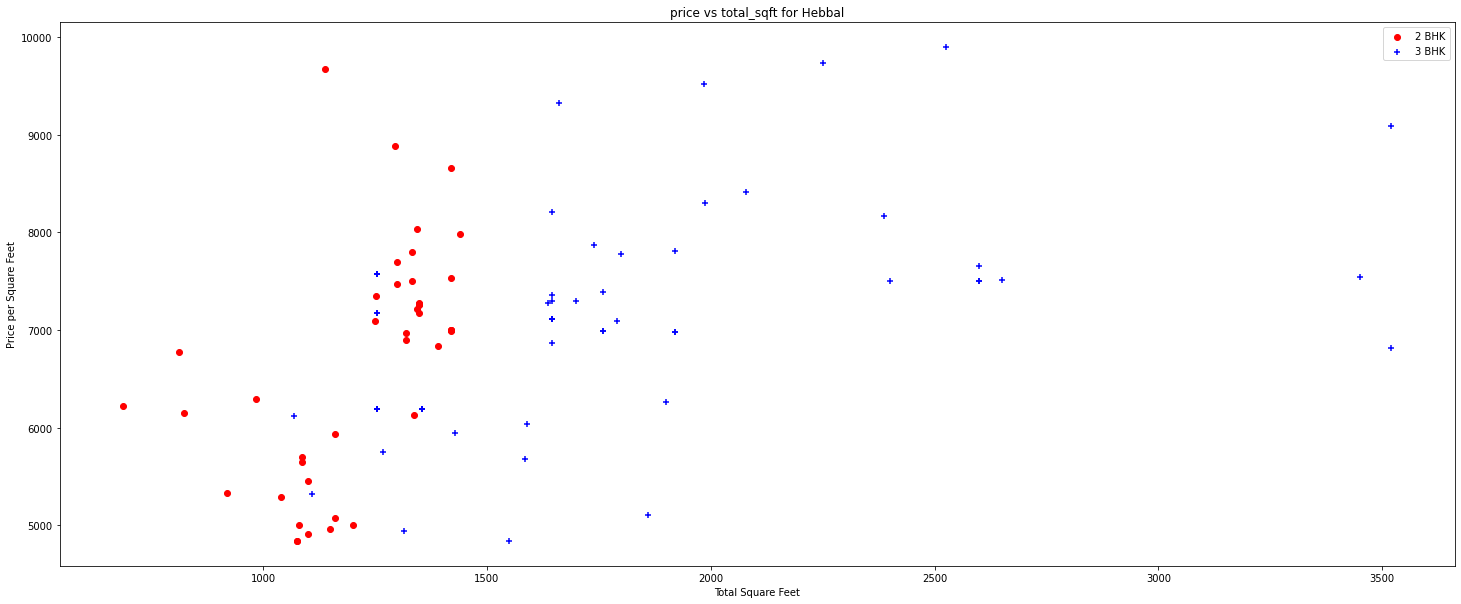

In [56]:
diagramScatter(df10, 'Hebbal')

In [57]:
def delete_ouliner_BHK(df):
  selected = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('BHK'):
      bhk_stats [bhk] = {'mean': np.mean(bhk_df.price_per_sqft), 
                         'std': np.std(bhk_df.price_per_sqft), 
                         'count': bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('BHK'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count'] > 5:
        selected = np.append(selected, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
  return df.drop(selected, axis='index')

df11 = delete_ouliner_BHK(df10)
df11.shape
  

(7317, 7)

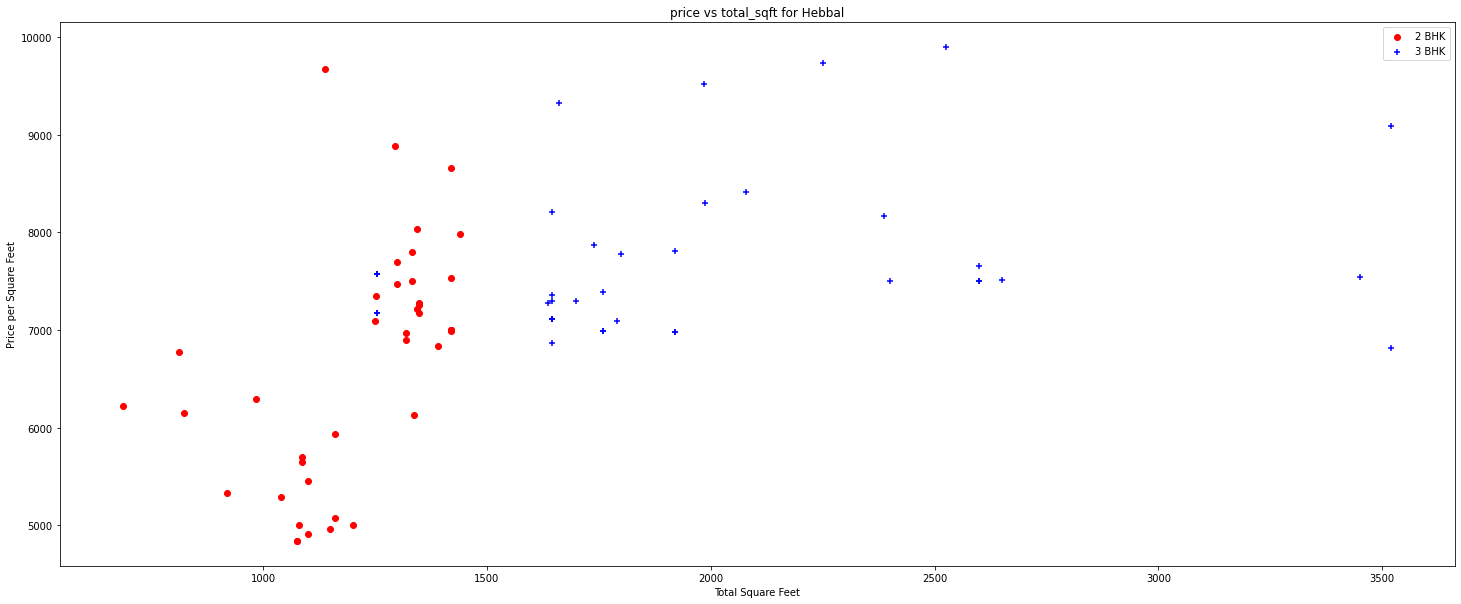

In [58]:
diagramScatter(df11, 'Hebbal')

Text(0, 0.5, 'Count')

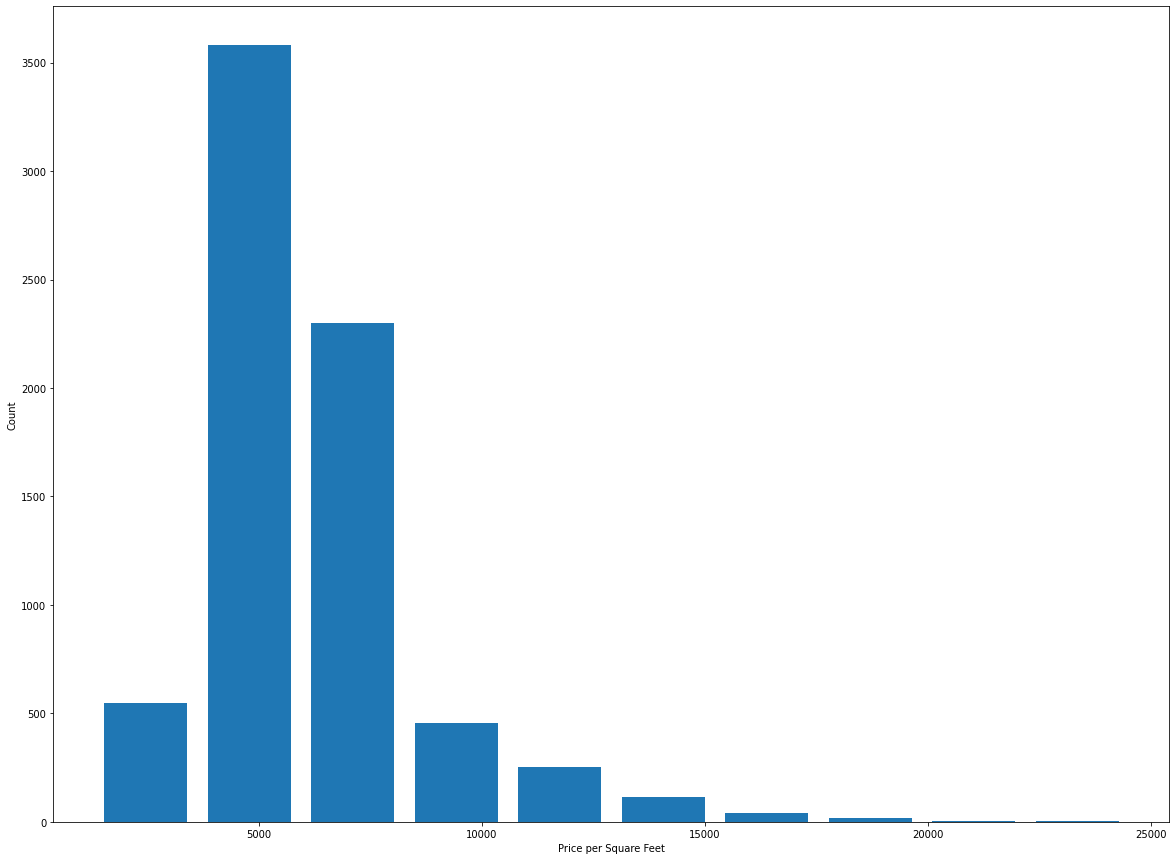

In [59]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
plt.hist(df11.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

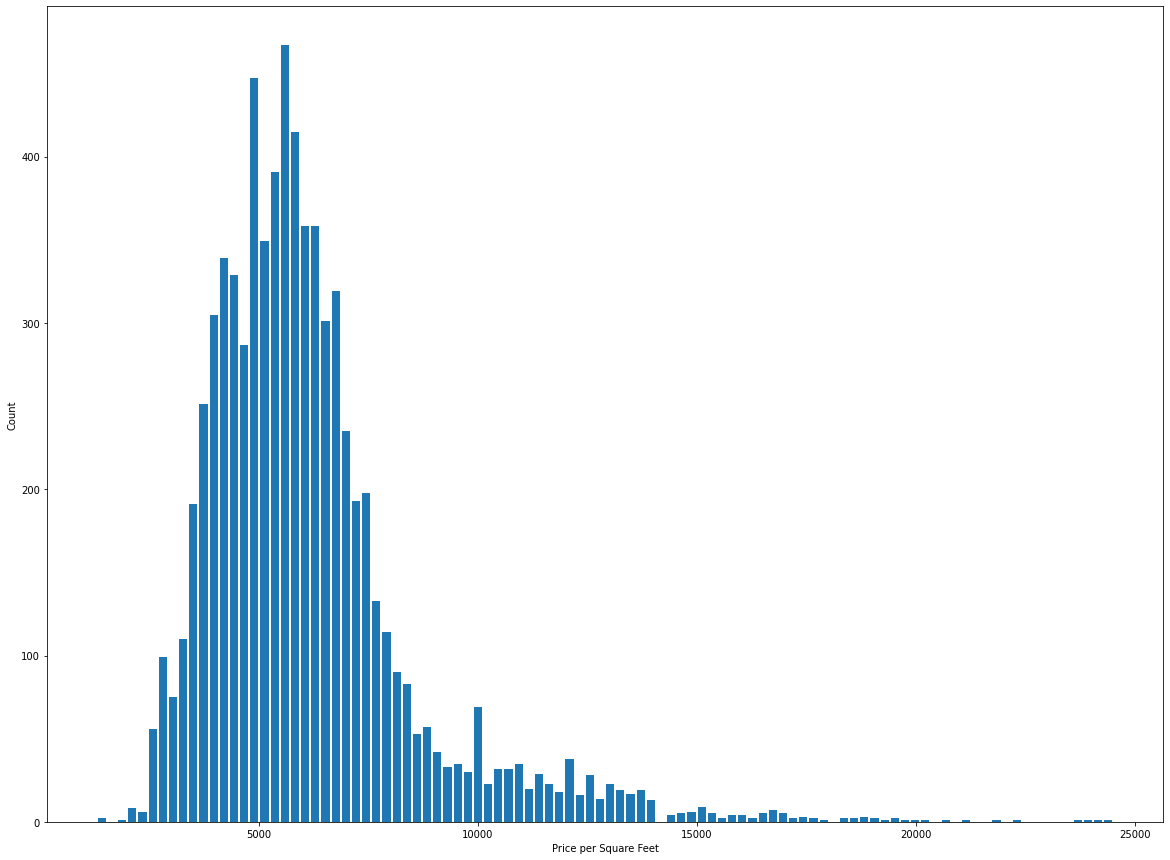

In [60]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
plt.hist(df11.price_per_sqft, bins=100, rwidth=0.8)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

In [61]:
df11.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [62]:
df11[df11.bath > 10].bath.unique()

array([12., 16., 13.])

Text(0, 0.5, 'Count')

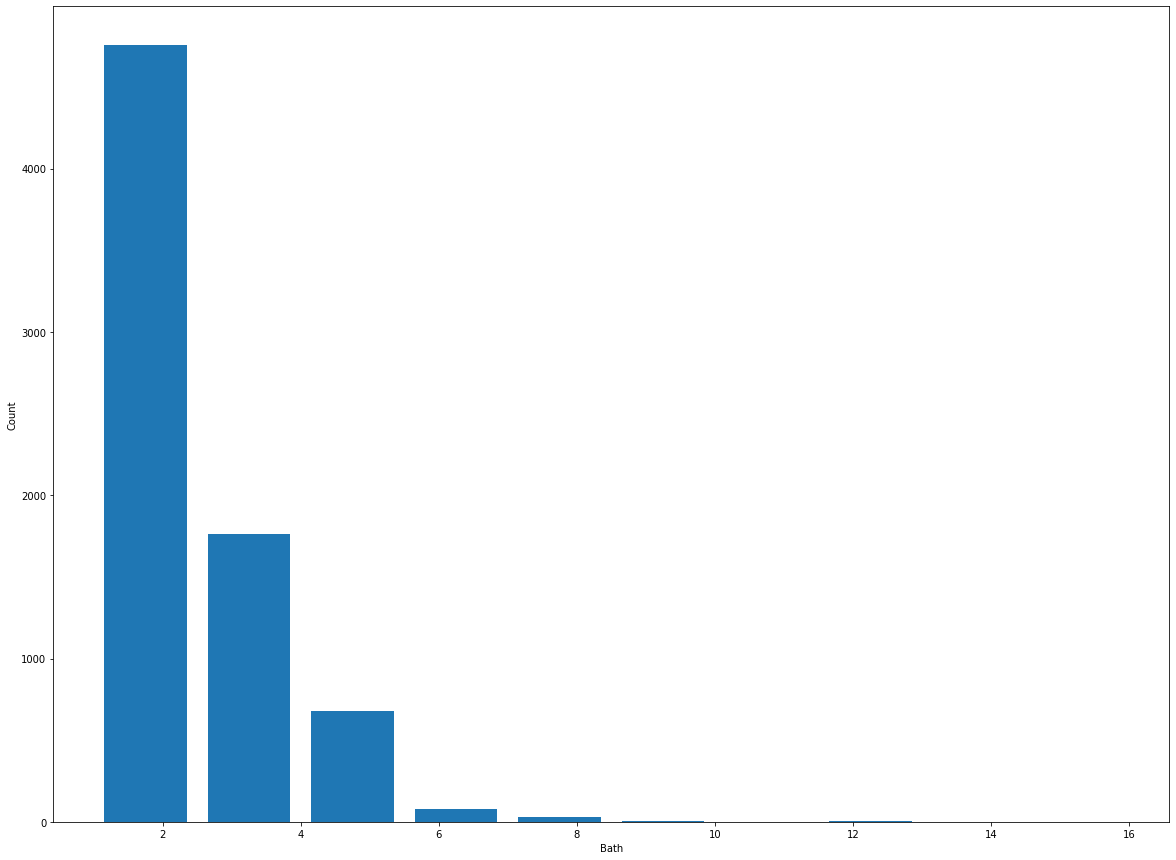

In [63]:
plt.hist(df11.bath, rwidth=0.8)
plt.xlabel('Bath')
plt.ylabel('Count')

In [64]:
df12 = df11[df11.bath < df11.BHK+2]
df12.shape

(7239, 7)

In [65]:
df12.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [66]:
df13 = df12.drop(['price_per_sqft', 'size'], axis='columns')
df13.head()

,location,total_sqft,bath,price,BHK
210,1st Block Jayanagar,2850.0,4.0,428.0,4
848,1st Block Jayanagar,1630.0,3.0,194.0,3
2152,1st Block Jayanagar,1875.0,2.0,235.0,3
7138,1st Block Jayanagar,1200.0,2.0,130.0,3
7358,1st Block Jayanagar,1235.0,2.0,148.0,2


In [67]:
dummies = pd.get_dummies(df13.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
210,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df14 = pd.concat([df13, dummies.drop('other', axis='columns')], axis='columns')
df14.head()
df15 = df14.drop(['location'], axis='columns')
df15.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X = df15.drop(['price'], axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y = df15.price
y.head()

210     428.0
848     194.0
2152    235.0
7138    130.0
7358    148.0
Name: price, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [72]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8629132245229443

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_parameters(X, y):
  algo = {
    'linear_regression': {
      'model': LinearRegression(),
      'params': {
        'normalize': [True, False]
      }
    },
    'lasso': {
      'model': Lasso(),
      'params': {
        'alpha': [1, 2],
        'selection': ['random', 'cyclic']
      }
    },
    'decision_tree': {
      'model': DecisionTreeRegressor(),
      'params':{
        'criterion': ['mse', 'friedman_mse'],
        'splitter': ['best', 'random']
      }
    }
  }
    
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algo.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X, y)
    scores.append({
      'model': algo_name,
      'best_score': gs.best_score_,
      'best_params': gs.best_params_
    })
  return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_parameters(X, y)

C:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the p

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726795,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.714250,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [75]:
X.columns
X[X["5th Block Hbr Layout"]>0].head(20)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1972,1206.0,2.0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2020,1270.0,2.0,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5754,1312.0,2.0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10354,1100.0,2.0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10566,3600.0,5.0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11908,5100.0,5.0,6,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
np.where(X.columns == '5th Block Hbr Layout')[0][0]

7

In [77]:
def predictPrice(location, sqft, bath, bhk):
  loc_index = np.where(X.columns == location)[0][0]
  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_index >= 0:
    x[loc_index] = 1
  
  return lr_clf.predict([x])[0]

In [78]:
predictPrice('5th Block Hbr Layout', 1000, 3, 3)

C:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


13.315621533395309

In [79]:
predictPrice('Indira Nagar', 1000, 2, 2)

C:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.31197733179914

In [80]:
predictPrice('Indira Nagar', 1000, 3, 3)

C:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.52689759854678

In [81]:
import pickle
with open ('banglore_home_prices.pickle', 'wb') as f:
  pickle.dump(lr_clf, f) 

In [82]:
import json
columns = {
  'data_columns': [col.lower() for col in X.columns]
}
with open('columns1 .json', 'w') as f:
  json.dump(columns, f, indent=4)

In [83]:
import json
columns = {
  'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
  f.write(json.dumps(columns))